<a href="https://colab.research.google.com/github/ChitteshKumar/ML_projects/blob/main/NeuralStyleTransfer_Method2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dependencies and Pretrained Model
(Here we are using a pretrained model)

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
#loading the model using the hub
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

Preprocess Image and Load

In [ ]:
#importing the local images
from google.colab import files
uploaded = files.upload()

Saving city.jpg to city.jpg
Saving style1.jpg to style1.jpg


In [ ]:
#function to load the image
def load_image(image_path):
  img = tf.io.read_file(image_path) #reading the image path
  img = tf.image.decode_image(img, channels=3) #decode the binary image data, also specifies that the image should have three channels (RGB)
  img = tf.image.convert_image_dtype(img, tf.float32) #converting the original data type of image to float32
  img = img[tf.newaxis,:] #image with new array having a new axis, (2D image to 3D tensor - can be thought of 3D array)
  return img

In [ ]:
#passing the images to the above defined load function
content_image = load_image('city.jpg')
style_image = load_image('style1.jpg')

## Visualization

In [ ]:
content_image.shape

# a single image stored in different arrays, 1 -> batch size (since only one image is present so 1)
#                                                                   360 -> height of the image
#                                                                   542 -> width of the image
#                                                                   3 -> colour channel (RGB)


TensorShape([1, 601, 800, 3])

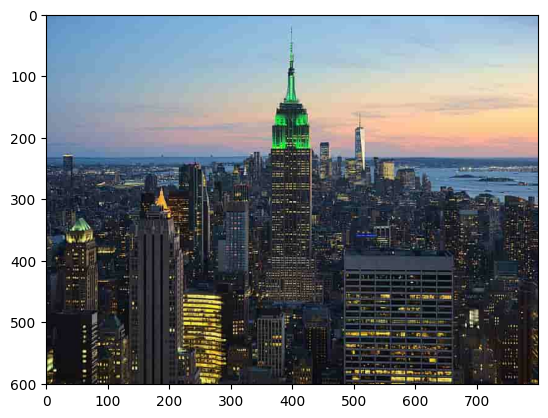

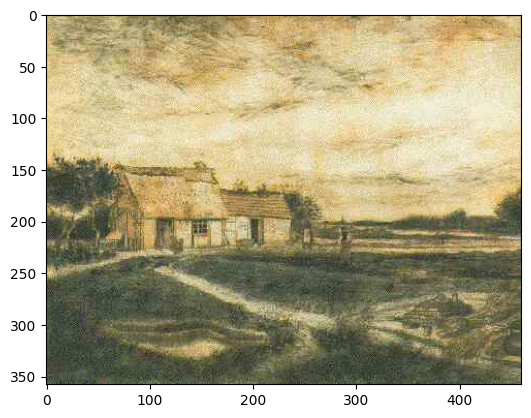

In [ ]:
#displaying the input images
plt.imshow(np.squeeze(content_image)) #np.squeeze is used to extract the image shape from the array to display it using matplotlib or to remove the batch size
plt.show()
print('\n')
plt.imshow(np.squeeze(style_image))
plt.show()

Styling the Output

In [ ]:
styled_image = model(tf.constant(content_image), tf.constant(style_image))[0]
#Pretrained model is used. Content and style images are passed to the model and extracting the first result ([0]).
#tf.constant() - to make constant tensor with fixed tensor values

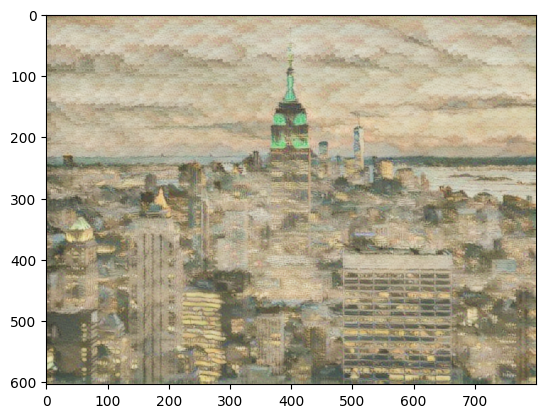

In [ ]:
plt.imshow(np.squeeze(styled_image))
plt.show()

In [ ]:
#exporting the image
cv2.imwrite('generated_image.jpg', cv2.cvtColor(np.squeeze(styled_image)*255, cv2.COLOR_BGR2RGB))

True